# Project 1

Dataset: [Ames Housing Dataset](https://www.kaggle.com/datasets/marcopale/housing)

Data Documentation: [Variable Description](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

Method: Tree Based Methods

Motivation behind method: Circumvents problem of too many features 


### Import Libraries

In [1]:
# Import relevant libraries
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
import sklearn.metrics as skl_metric
import sklearn.tree as skl_tree
from ISLP.models import ModelSpec as MS

import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
# Set directory
os.chdir('/Users/Vageli/Desktop/DABN14/Project/Project_1')

# Load data 
housing_data = pd.read_csv("./Data/AmesHousing.csv")
display(housing_data)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

### Data Cleaning & Preprocessing

In [3]:
# Dropping identifiers
housing_data=housing_data.drop(columns=['Order', 'PID'])

# Check missing values and data types
housing_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [4]:
# Keep columns with at least 90% non-NA values
threshold = 0.9 * len(housing_data)
housing_data = housing_data.dropna(axis=1, thresh=threshold)
housing_data.info(verbose=True)

# Drop rows with missing values
housing_data = housing_data.dropna(axis=0)
display(housing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Area         2930 non-null   int64  
 3   Street           2930 non-null   object 
 4   Lot Shape        2930 non-null   object 
 5   Land Contour     2930 non-null   object 
 6   Utilities        2930 non-null   object 
 7   Lot Config       2930 non-null   object 
 8   Land Slope       2930 non-null   object 
 9   Neighborhood     2930 non-null   object 
 10  Condition 1      2930 non-null   object 
 11  Condition 2      2930 non-null   object 
 12  Bldg Type        2930 non-null   object 
 13  House Style      2930 non-null   object 
 14  Overall Qual     2930 non-null   int64  
 15  Overall Cond     2930 non-null   int64  
 16  Year Built       2930 non-null   int64  
 17  Year Remod/Add

MS SubClass MS Zoning  Lot Area Street Lot Shape Land Contour Utilities  \
0              20        RL     31770   Pave       IR1          Lvl    AllPub   
1              20        RH     11622   Pave       Reg          Lvl    AllPub   
2              20        RL     14267   Pave       IR1          Lvl    AllPub   
3              20        RL     11160   Pave       Reg          Lvl    AllPub   
4              60        RL     13830   Pave       IR1          Lvl    AllPub   
...           ...       ...       ...    ...       ...          ...       ...   
2924           20        RL     20000   Pave       Reg          Lvl    AllPub   
2925           80        RL      7937   Pave       IR1          Lvl    AllPub   
2926           20        RL      8885   Pave       IR1          Low    AllPub   
2928           20        RL     10010   Pave       Reg          Lvl    AllPub   
2929           60        RL      9627   Pave       Reg          Lvl    AllPub   

     Lot Config Land Slope Neighborhood  ... Enclosed Porch 3Ssn Porch  \
0        Corner        Gtl        NAmes  ...              0          0   
1        Inside        Gtl        NAmes  ...              0          0   
2        Corner        Gtl        NAmes  ...              0          0   
3        Corner        Gtl        NAmes  ...              0          0   
4        Inside        Gtl      Gilbert  ...              0          0   
...         ...        ...          ...  ...            ...        ...   
2924     Inside        Gtl      Mitchel  ...              0          0   
2925    CulDSac        Gtl      Mitchel  ...              0          0   
2926     Inside        Mod      Mitchel  ...              0          0   
2928     Inside        Mod      Mitchel  ...              0          0   
2929     Inside        Mod      Mitchel  ...              0          0   

     Screen Porch Pool Area  Misc Val  Mo Sold  Yr Sold  Sale Type  \
0               0         0         0        5     2010        WD    
1             120         0         0        6     2010        WD    
2               0         0     12500        6     2010        WD    
3               0         0         0        4     2010        WD    
4               0         0         0        3     2010        WD    
...           ...       ...       ...      ...      ...        ...   
2924            0         0         0        9     2006        WD    
2925            0         0         0        3     2006        WD    
2926            0         0         0        6     2006        WD    
2928            0         0         0        4     2006        WD    
2929            0         0         0       11     2006        WD    

     Sale Condition SalePrice  
0            Normal    215000  
1            Normal    105000  
2            Normal    172000  
3            Normal    244000  
4            Normal    189900  
...             ...       ...  
2924        Abnorml    131000  
2925         Normal    142500  
2926         Normal    131000  
2928         Normal    170000  
2929         Normal    188000  

[2678 rows x 73 columns]

In [5]:
# Converting "year-variables" into "age when bought"-variables
housing_data['house_age'] = housing_data['Yr Sold'] - housing_data['Year Built']
housing_data['house_remodeled_age'] = housing_data['Yr Sold'] - housing_data['Year Remod/Add']
housing_data['garage_age'] = housing_data['Yr Sold']-housing_data['Garage Yr Blt']

# Drop old "year-variables"
housing_data = housing_data.drop(columns=['Yr Sold', 'Year Built', 'Year Remod/Add','Garage Yr Blt'])

# Converting dwelling type into a categorical variable 
housing_data['MS SubClass']=housing_data['MS SubClass'].astype('category')

# Converting "Mo Sold" into categorical 
housing_data['Mo Sold']=housing_data['Mo Sold'].astype('category')

# Convert dtype "object" into "category"
categorical_cols = housing_data.select_dtypes(include=['object']).columns
housing_data[categorical_cols] = housing_data[categorical_cols].astype('category')

housing_data.info(verbose=True)
display(housing_data)

<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 0 to 2929
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MS SubClass          2678 non-null   category
 1   MS Zoning            2678 non-null   category
 2   Lot Area             2678 non-null   int64   
 3   Street               2678 non-null   category
 4   Lot Shape            2678 non-null   category
 5   Land Contour         2678 non-null   category
 6   Utilities            2678 non-null   category
 7   Lot Config           2678 non-null   category
 8   Land Slope           2678 non-null   category
 9   Neighborhood         2678 non-null   category
 10  Condition 1          2678 non-null   category
 11  Condition 2          2678 non-null   category
 12  Bldg Type            2678 non-null   category
 13  House Style          2678 non-null   category
 14  Overall Qual         2678 non-null   int64   
 15  Overall Cond         2678 

MS SubClass MS Zoning  Lot Area Street Lot Shape Land Contour Utilities  \
0             20        RL     31770   Pave       IR1          Lvl    AllPub   
1             20        RH     11622   Pave       Reg          Lvl    AllPub   
2             20        RL     14267   Pave       IR1          Lvl    AllPub   
3             20        RL     11160   Pave       Reg          Lvl    AllPub   
4             60        RL     13830   Pave       IR1          Lvl    AllPub   
...          ...       ...       ...    ...       ...          ...       ...   
2924          20        RL     20000   Pave       Reg          Lvl    AllPub   
2925          80        RL      7937   Pave       IR1          Lvl    AllPub   
2926          20        RL      8885   Pave       IR1          Low    AllPub   
2928          20        RL     10010   Pave       Reg          Lvl    AllPub   
2929          60        RL      9627   Pave       Reg          Lvl    AllPub   

     Lot Config Land Slope Neighborhood  ... Screen Porch Pool Area Misc Val  \
0        Corner        Gtl        NAmes  ...            0         0        0   
1        Inside        Gtl        NAmes  ...          120         0        0   
2        Corner        Gtl        NAmes  ...            0         0    12500   
3        Corner        Gtl        NAmes  ...            0         0        0   
4        Inside        Gtl      Gilbert  ...            0         0        0   
...         ...        ...          ...  ...          ...       ...      ...   
2924     Inside        Gtl      Mitchel  ...            0         0        0   
2925    CulDSac        Gtl      Mitchel  ...            0         0        0   
2926     Inside        Mod      Mitchel  ...            0         0        0   
2928     Inside        Mod      Mitchel  ...            0         0        0   
2929     Inside        Mod      Mitchel  ...            0         0        0   

     Mo Sold  Sale Type  Sale Condition SalePrice house_age  \
0          5        WD           Normal    215000        50   
1          6        WD           Normal    105000        49   
2          6        WD           Normal    172000        52   
3          4        WD           Normal    244000        42   
4          3        WD           Normal    189900        13   
...      ...        ...             ...       ...       ...   
2924       9        WD          Abnorml    131000        46   
2925       3        WD           Normal    142500        22   
2926       6        WD           Normal    131000        23   
2928       4        WD           Normal    170000        32   
2929      11        WD           Normal    188000        13   

     house_remodeled_age garage_age  
0                     50       50.0  
1                     49       49.0  
2                     52       52.0  
3                     42       42.0  
4                     12       13.0  
...                  ...        ...  
2924                  10       46.0  
2925                  22       22.0  
2926                  23       23.0  
2928                  31       31.0  
2929                  12       13.0  

[2678 rows x 72 columns]

## Analysis

#### Prepare Data 

In [6]:
# Transform all variables that are not numeric into dummies
housing_data = pd.get_dummies(housing_data, drop_first=False)
display(housing_data.shape)

# Define the features and target variable
X = housing_data.drop(columns=['SalePrice'])
y = housing_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = skm.train_test_split(
    X, y,
    test_size=0.30,
    random_state=0
)

(2678, 297)

#### Descriptive Statistics of Target Variable

In [7]:
# Descriptive statistics
descriptive_stats = y.describe()
print(descriptive_stats)

count      2678.000000
mean     186405.726288
std       79501.568299
min       12789.000000
25%      134575.000000
50%      166650.000000
75%      218641.750000
max      755000.000000
Name: SalePrice, dtype: float64


### Simple Regression Tree

In [8]:
from sklearn.tree import (DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score ,
                             log_loss) 
from sklearn.ensemble import \
(RandomForestRegressor as RF, GradientBoostingRegressor as GBR)


#### Regression Tree: No Pruning

In [9]:
# Train the decision tree model
reg = DTR(random_state=0)

# Fit the decision tree on the training data
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

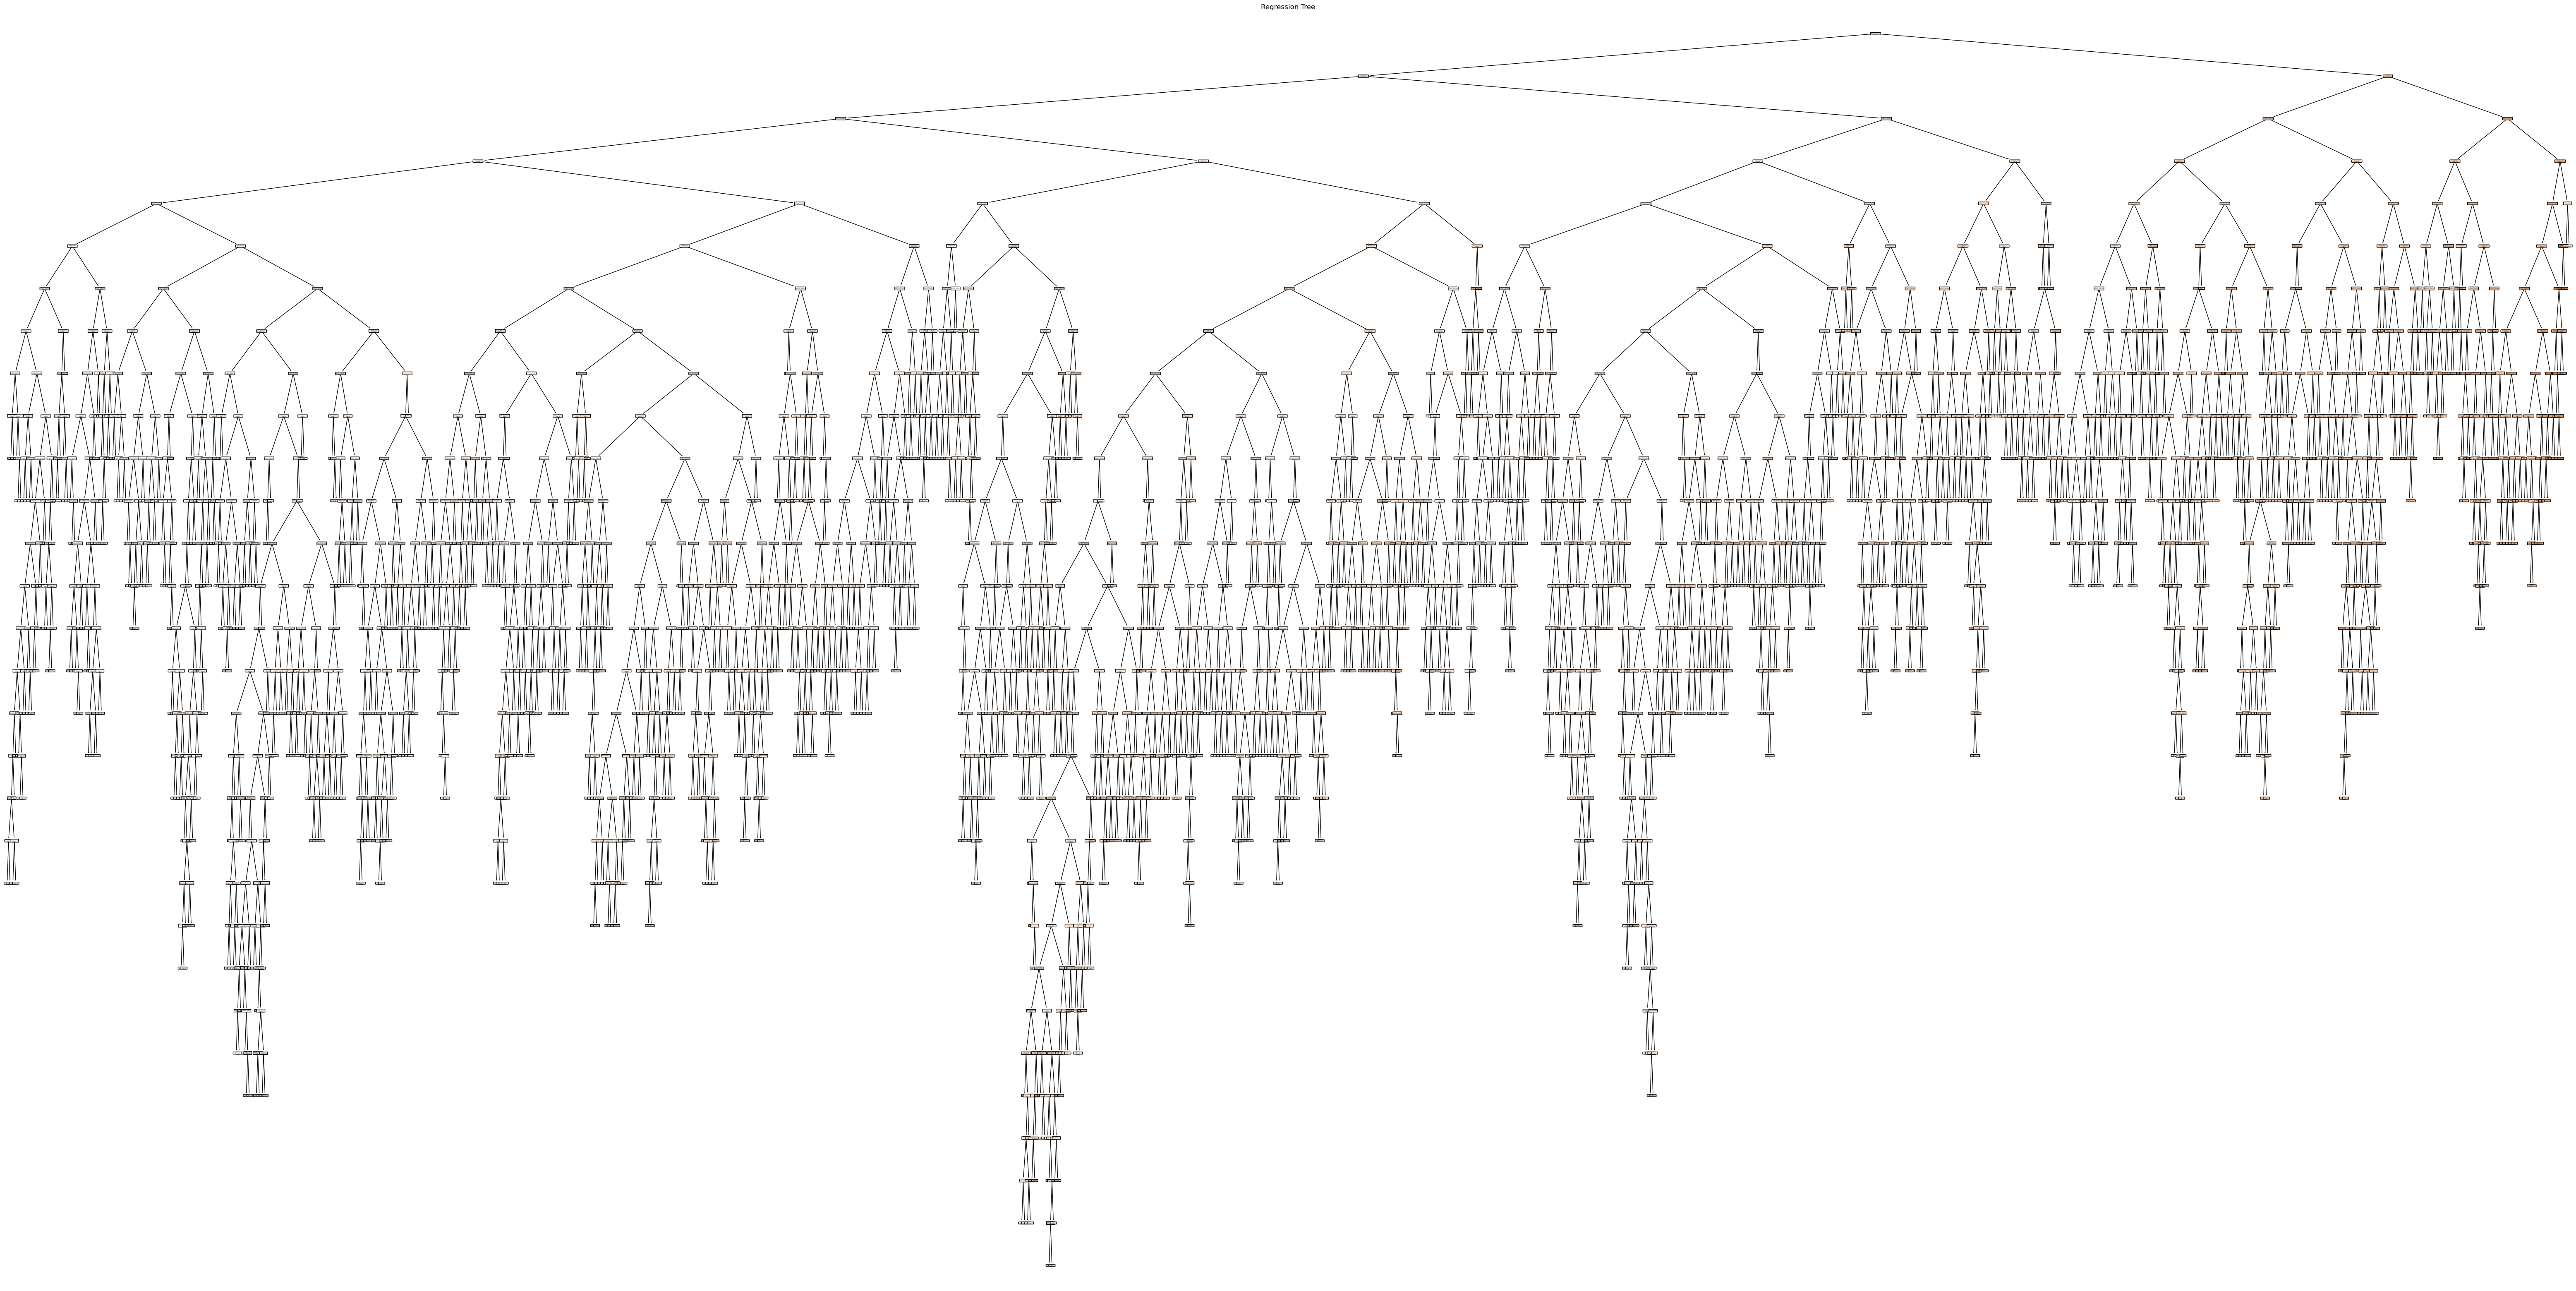

In [10]:
# Visualize decision tree
plt.figure(figsize=(80, 40))
skl_tree.plot_tree(reg, feature_names=X.columns, 
                   filled=True, rounded=True)
plt.title("Regression Tree")
plt.show()

In [11]:
# Performance evaluation 
MSE=np.mean((reg.predict(X_test)-y_test)**2)
RMSE = np.sqrt(MSE)
print(f"MSE: {MSE:.0f}")
print(f"RMSE: {RMSE:.0f}")

MSE: 1518741917
RMSE: 38971


#### Regression Tree: Pruning

In [12]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [13]:
best_ = grid.best_estimator_

MSE_best = np.mean((y_test - best_.predict(X_test))**2)
RMSE_best = np.sqrt(MSE_best)
print(f"MSE: {MSE_best:.0f}")
print(f"RMSE: {RMSE_best:.0f}")

MSE: 1366036500
RMSE: 36960


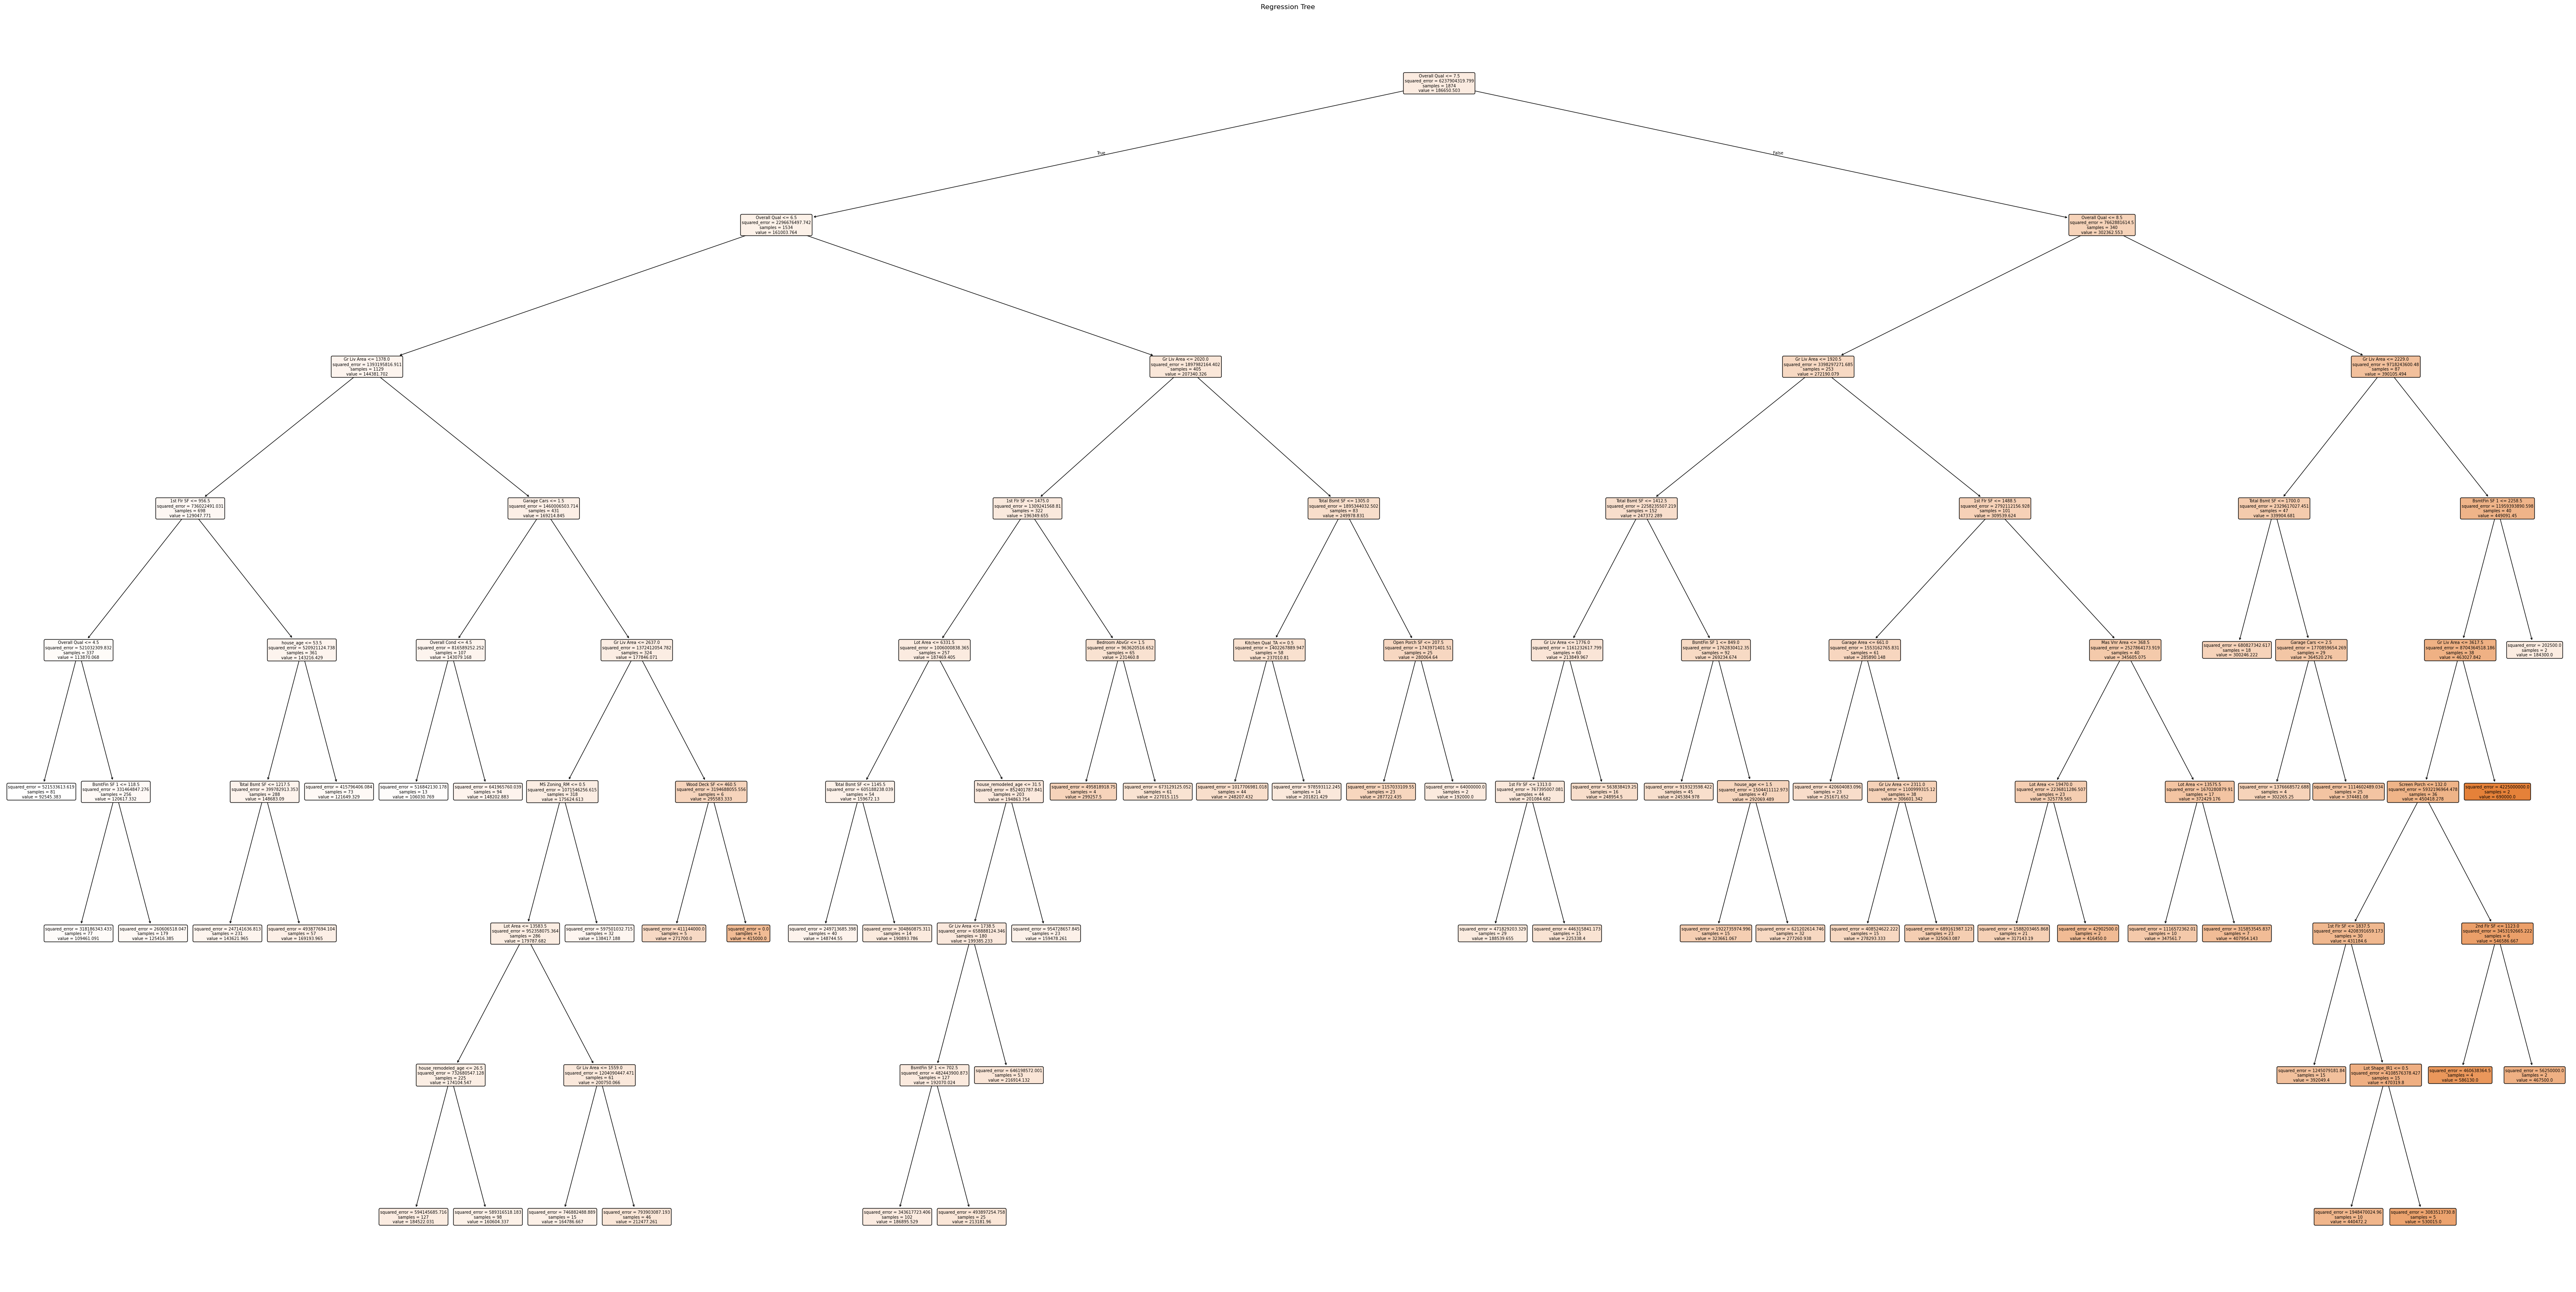

In [14]:
# Visualize decision tree
plt.figure(figsize=(80, 40))
skl_tree.plot_tree(best_, feature_names=X.columns, 
                   filled=True, rounded=True)
plt.title("Regression Tree")
plt.show()

### Gradient Boosting

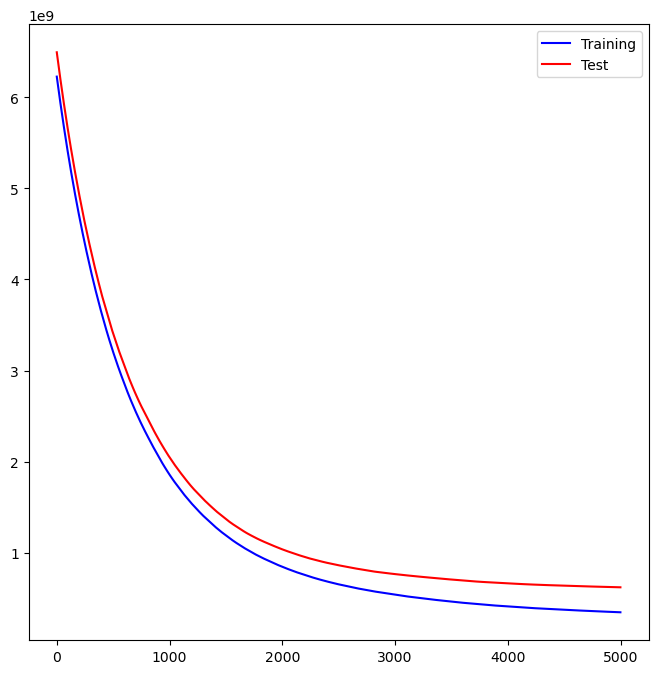

In [15]:
boost_house=GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)

boost_house.fit(X_train,y_train)



test_error = np.zeros_like(boost_house.train_score_)
for idx, y_ in enumerate(boost_house.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost_house.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_house.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

In [16]:
y_hat_boost=boost_house.predict(X_test)
MSEBOOST=np.mean((y_test-y_hat_boost)**2)
display(np.sqrt(MSEBOOST))

24875.598903569076

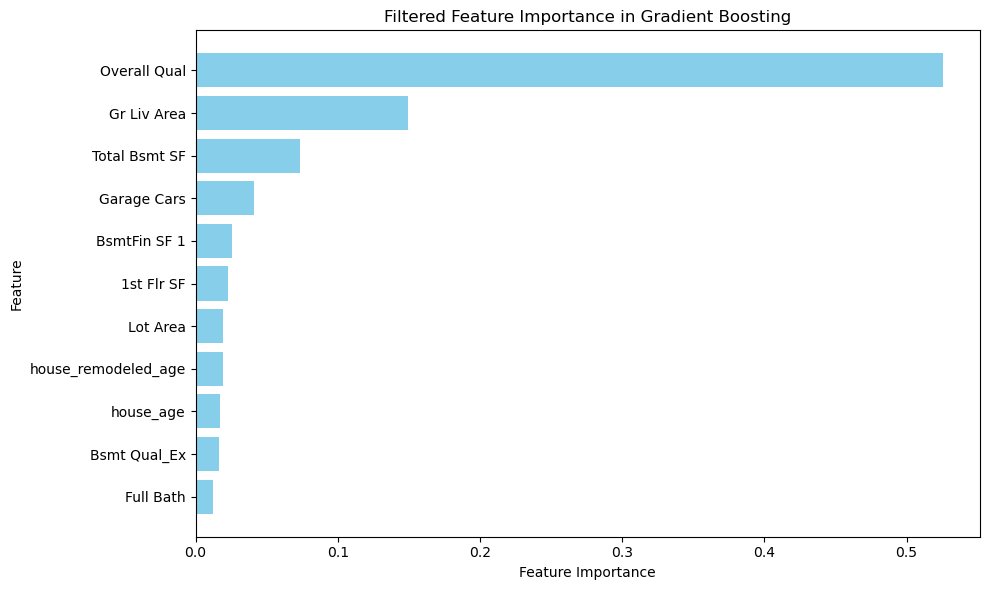

In [17]:

# Assuming boost_house is already trained
# Extract feature importances
feature_importances = boost_house.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Set a threshold for feature importance
importance_threshold = 0.01  # Adjust this threshold as needed

# Filter features by importance
filtered_idx = np.where(feature_importances > importance_threshold)[0]
filtered_importances = feature_importances[filtered_idx]
filtered_features = [feature_names[i] for i in filtered_idx]

# Sort filtered features by importance
sorted_idx = np.argsort(filtered_importances)
sorted_importances = filtered_importances[sorted_idx]
sorted_features = [filtered_features[i] for i in sorted_idx]

# Plot the filtered features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Filtered Feature Importance in Gradient Boosting")
plt.tight_layout()
plt.show()

In [18]:
feature_imp_boost = pd.DataFrame(
    {'importance':boost_house.feature_importances_},
    index=feature_names)
feature_imp_boost.sort_values(by='importance', ascending=False)

important_features_boost = feature_imp_boost[feature_imp_boost['importance'] > 0.01]
display(important_features_boost.sort_values(by='importance',ascending=False))

importance
Overall Qual           0.525418
Gr Liv Area            0.149447
Total Bsmt SF          0.073601
Garage Cars            0.041171
BsmtFin SF 1           0.025930
1st Flr SF             0.022744
Lot Area               0.019146
house_remodeled_age    0.019107
house_age              0.016871
Bsmt Qual_Ex           0.016532
Full Bath              0.012556

### Bagging

In [19]:
## bagging


bag_house=RF(max_features=X_train.shape[1],random_state=0,n_estimators=5000)
bag_house.fit(X_train,y_train)

MSE_bag=np.mean(((bag_house.predict(X_test)-y_test)**2))
display(MSE_bag)
display(np.sqrt(MSE_bag))

#feature_imp = pd.DataFrame(
    #{'importance':bag_house.feature_importances_},
    #index=feature_names)
#feature_imp.sort_values(by='importance', ascending=False)


745576995.3739429

27305.255819602622

In [21]:
feature_importances_bag = bag_house.feature_importances_
feature_names_bag = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Set a threshold for feature importance
importance_threshold = 0.01  # Adjust this threshold as needed

# Filter features by importance
filtered_idx_bag = np.where(feature_importances_bag > importance_threshold)[0]
filtered_importances_bag = feature_importances_bag[filtered_idx]
filtered_features_bag = [feature_names_bag[i] for i in filtered_idx_bag]

# Sort filtered features by importance
sorted_idx_bag = np.argsort(filtered_importances_bag)
sorted_importances_bag = filtered_importances_bag[sorted_idx_bag]
sorted_features_bag = [filtered_features_bag[i] for i in sorted_idx_bag]

# Plot the filtered features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_bag, sorted_importances_bag, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Filtered Feature Importance in Bagging")
plt.tight_layout()
plt.show()

IndexError: list index out of range

17.204650534085253

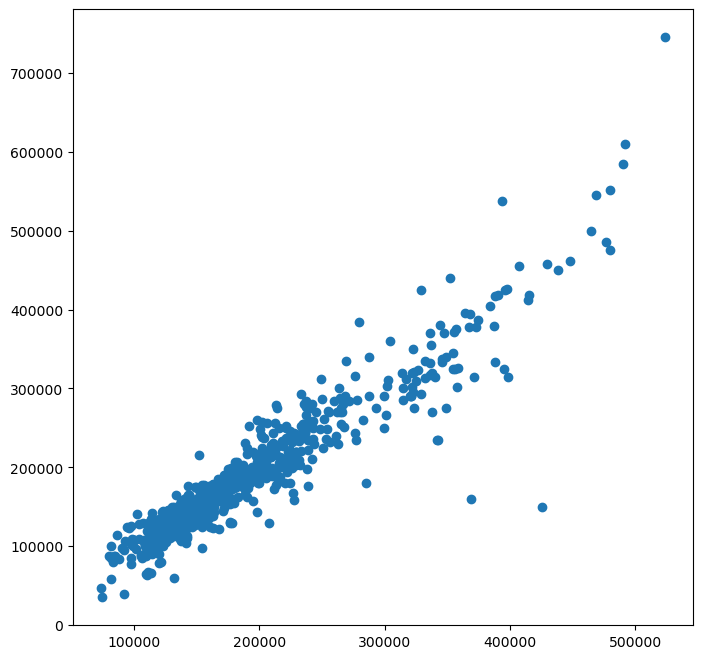

In [22]:
ax=subplots(figsize=(8,8))[1]
ax.scatter(bag_house.predict(X_test),y_test)

display(np.sqrt(X_train.shape[1]))

### Random Forest

In [23]:
#random forest
RF_house=RF(max_features=int(np.round(X_train.shape[1]/2,decimals=0)),
            random_state=0,n_estimators=5000)
RF_house.fit(X_train,y_train)
MSE_rf=np.mean((y_test-RF_house.predict(X_test))**2)

display(MSE_rf)
display(np.sqrt(MSE_rf))

feature_imp_RF = pd.DataFrame(
    {'importance':RF_house.feature_importances_},
    index=feature_names)
feature_imp_RF.sort_values(by='importance', ascending=False)

important_features_rf = feature_imp_RF[feature_imp_RF['importance'] > 0.01]
display(important_features_rf.sort_values(by='importance',ascending=False))


656529243.0472957

25622.82660143677

importance
Overall Qual           0.368665
Gr Liv Area            0.135381
Garage Cars            0.075774
Total Bsmt SF          0.055849
Exter Qual_TA          0.040817
1st Flr SF             0.038870
house_age              0.030707
Bsmt Qual_Ex           0.028241
Lot Area               0.019825
BsmtFin SF 1           0.019505
Full Bath              0.018383
Garage Area            0.015593
2nd Flr SF             0.013541
house_remodeled_age    0.011340

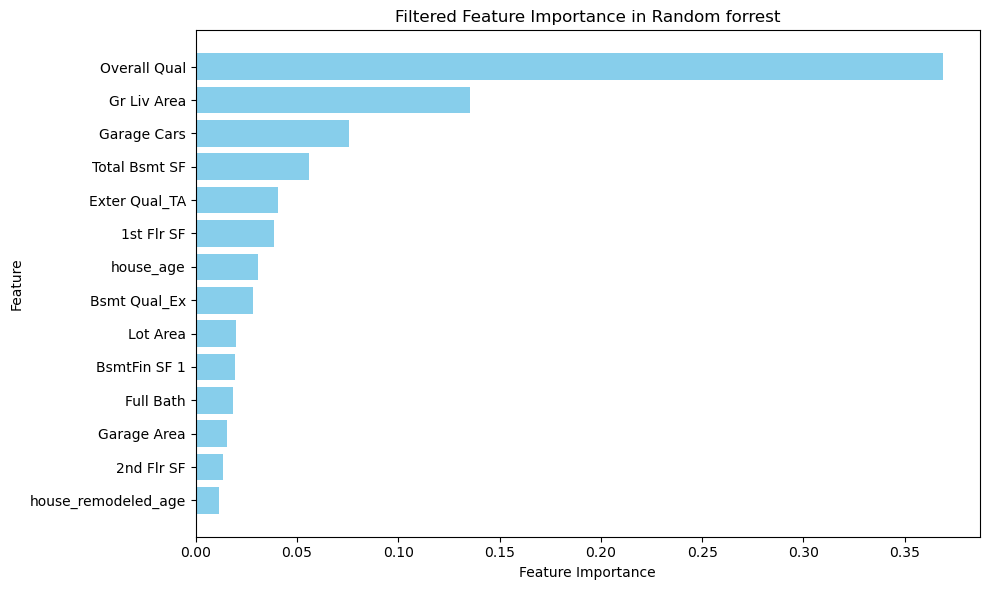

In [24]:
#Feature importance random forrest
feature_importances_rf = RF_house.feature_importances_
feature_names_rf = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Set a threshold for feature importance
importance_threshold = 0.01  # Adjust this threshold as needed

# Filter features by importance
filtered_idx_rf = np.where(feature_importances_rf > importance_threshold)[0]
filtered_importances_rf = feature_importances_rf[filtered_idx_rf]
filtered_features_rf = [feature_names_rf[i] for i in filtered_idx_rf]

# Sort filtered features by importance
sorted_idx_rf = np.argsort(filtered_importances_rf)
sorted_importances_rf = filtered_importances_rf[sorted_idx_rf]
sorted_features_rf = [filtered_features_rf[i] for i in sorted_idx_rf]

# Plot the filtered features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_rf, sorted_importances_rf, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Filtered Feature Importance in Random forrest")
plt.tight_layout()
plt.show()

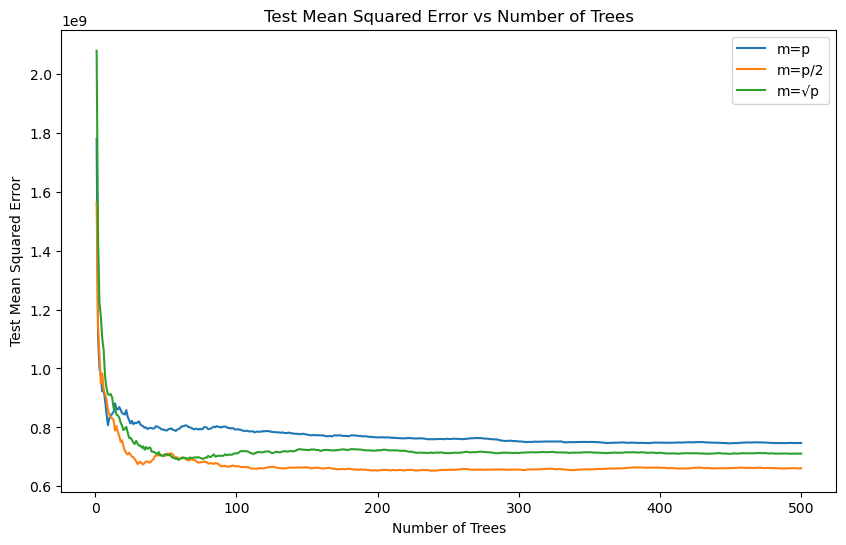

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define possible values of max_features
n_features = X_train.shape[1]
max_features_values = [n_features, n_features // 2, int(np.sqrt(n_features))]  # p, p/2, sqrt(p)

# Dictionary to store results for plotting
test_errors = {f"m={label}": [] for label in ['p', 'p/2', '√p']}
num_trees = 500  # Number of trees to evaluate

# Loop through each max_features configuration
for max_features, label in zip(max_features_values, ['p', 'p/2', '√p']):
    rf = RandomForestRegressor(max_features=max_features, random_state=0, warm_start=True)
    
    for n_trees in range(1, num_trees + 1):
        # Use warm_start to incrementally add trees
        rf.set_params(n_estimators=n_trees)
        rf.fit(X_train, y_train)
        
        # Predict on test data and calculate test MSE
        y_pred = rf.predict(X_test)
        test_error = mean_squared_error(y_test, y_pred)
        test_errors[f"m={label}"].append(test_error)

# Plot the results
plt.figure(figsize=(10, 6))
for label, errors in test_errors.items():
    plt.plot(range(1, num_trees + 1), errors, label=label)
plt.xlabel("Number of Trees")
plt.ylabel("Test Mean Squared Error")
plt.title("Test Mean Squared Error vs Number of Trees")
plt.legend()
plt.show()

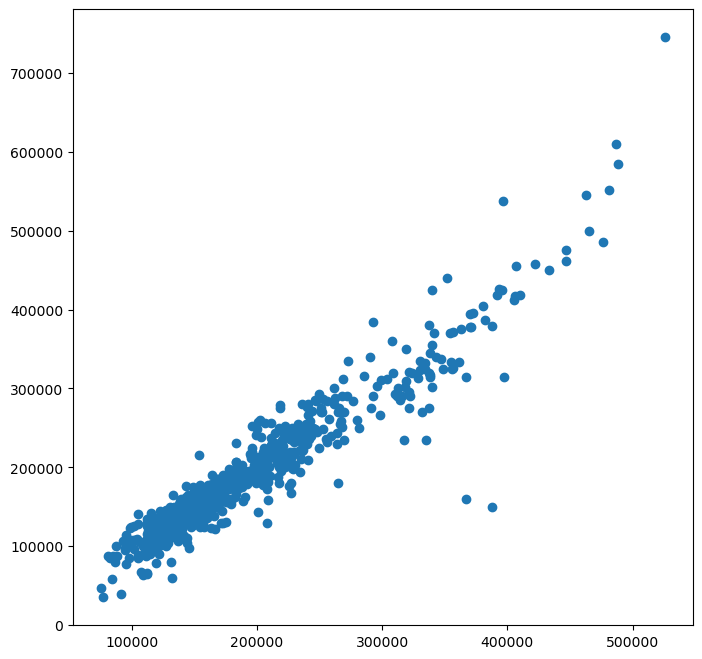

In [26]:
ax=subplots(figsize=(8,8))[1]
ax.scatter(RF_house.predict(X_test),y_test)

### XGBoost

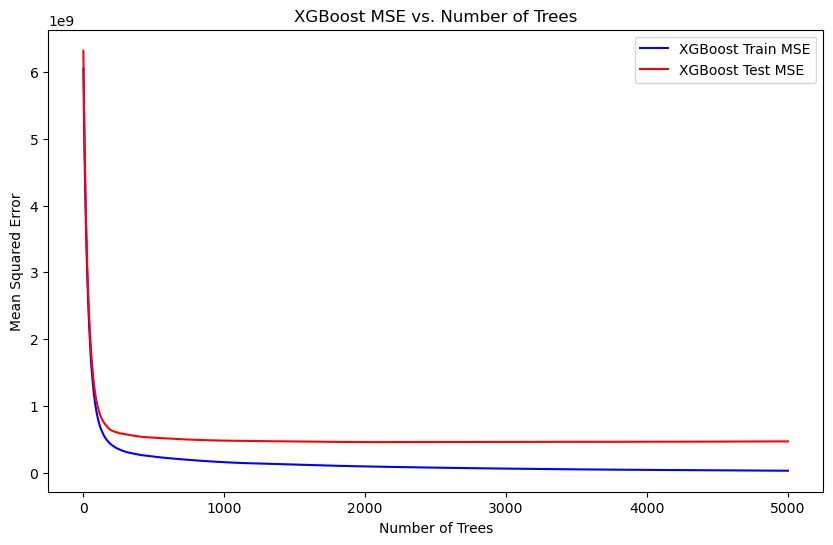

XGBoost - Final Test MSE: 468305910.1705


In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize the XGBoost Regressor with the specified parameters
xg_house = xgb.XGBRegressor(n_estimators=5000, max_depth=3, 
                            learning_rate=0.02, random_state=0, reg_lambda=0.1)

# Fit the model on the training data
xg_house.fit(X_train, y_train)

# Initialize lists to store training and test MSEs for staged predictions
train_mse_list = []
test_mse_list = []

# Perform staged predictions using `iteration_range`
# Make sure iteration_range respects the number of estimators trained (1 to 50 here)
for n_trees in range(1, xg_house.n_estimators + 1):
    train_predictions = xg_house.predict(X_train, iteration_range=(0, n_trees))
    test_predictions = xg_house.predict(X_test, iteration_range=(0, n_trees))
    
    # Calculate MSE for train and test predictions
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Plot the staged prediction results
plt.figure(figsize=(10, 6))
plt.plot(range(1, xg_house.n_estimators + 1), train_mse_list, label='XGBoost Train MSE', color='blue')
plt.plot(range(1, xg_house.n_estimators + 1), test_mse_list, label='XGBoost Test MSE', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('XGBoost MSE vs. Number of Trees')
plt.legend()
plt.show()

# Print final MSE for comparison with the existing gradient boosting model
y_hat_xgboost = xg_house.predict(X_test)
final_mse_xgboost = mean_squared_error(y_test, y_hat_xgboost)
print(f"XGBoost - Final Test MSE: {final_mse_xgboost:.4f}")

In [29]:
display(np.sqrt(mean_squared_error(y_test, y_hat_xgboost)))

21640.376849085987

In [30]:
print(25068**2)

628404624
